Author: Xiaocan Li

E-mail: lixiaocan2017@ia.ac.cn

Follow me on [My GitHub](https://github.com/HsiaoTsan).

Last modified: 9, Nov, 2018

# Method 1: use SVD to do PCA
Courtesy of [yalefaces database](http://cvc.cs.yale.edu/cvc/projects/yalefaces/yalefaces.html).

First, import necessary module.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

Read image data and combine into a matrix: `X_with_mean`

In [2]:
path='/home/lxc/pycode_lxc/yalefaces/'
f = open('path.txt')
X_with_mean = []
lines = [line.rstrip('\n') for line in f]

for i in range(len(lines)):
    img=cv2.imread(path+lines[i], 0)
    face_resize = cv2.resize(img, (0,0), fx = 0.5, fy = 0.5)
    X_with_mean.append(face_resize.flatten())

X_with_mean = np.matrix(X_with_mean).T
print X_with_mean.shape
x_mean = np.mean(X_with_mean, axis = 1)
print x_mean.shape

(2500, 165)
(2500, 1)


Show average face:

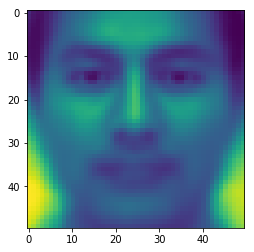

In [3]:
# Show average face.
avg_face = x_mean.reshape(50, 50)
plt.imshow(avg_face)
plt.show()

subtract the mean (column-wise), then do SVD.

In [4]:
# SVD the mean subtracted matrix
X = X_with_mean - x_mean
print X.shape
#covX = X.dot(X.T)
# print covX.shape
U, S, VT = np.linalg.svd(X)

(2500, 165)


In [5]:
print U.shape, VT.shape

(2500, 2500) (165, 165)


Set `MAX_NUM_EIGEN`, get the first `MAX_NUM_EIGEN` columns of `U` as principal axes,

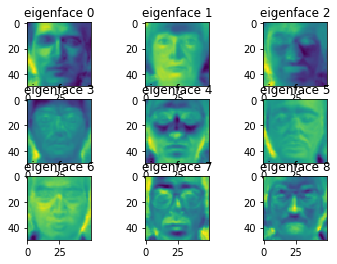

In [6]:
MAX_NUM_EIGEN = 10
eigenfaces = U[:, :MAX_NUM_EIGEN] # eigenvector(eigenface)

for i in range(9):
    plt.subplot(int("33"+str(i+1))); plt.title('eigenface ' + str(i))
    plt.imshow(eigenfaces[:, i].reshape(50, 50))
plt.show()

Show recovered face:

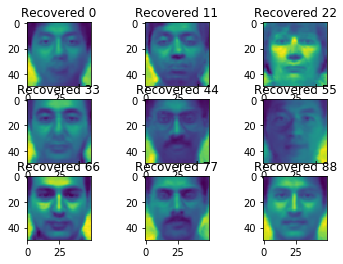

In [7]:
weights = eigenfaces.T.dot(X) # get weights, or coordinates under eigenfaces bases.
face_rec = eigenfaces.dot(weights) + x_mean # recover data 

for i,v  in enumerate(range(0, 99, 11)):
    plt.subplot(int("33"+str(i+1))); plt.title('Recovered ' + str(v))
    plt.imshow(face_rec[:, v].reshape(50, -1))
               
plt.show()

# Method 2: use OpenCV built-in PCA method
use your own `weights` list to generate new face

I didn't use `createDataMatrix` function to form an image stacked array.

I use `X_with_mean` in previous method.

## modified from original code  [here](https://www.learnopencv.com/eigenface-using-opencv-c-python/)

In [7]:

import cv2

def createDataMatrix(images):
    print("Creating data matrix")
    ''' 
    Allocate space for all images in one data matrix. 
        The size of the data matrix is
        ( w  * h, numImages )
        where,
        w = width of an image in the dataset.
        h = height of an image in the dataset.
        3 is for the 3 color channels.
        '''
   
    numImages = len(images)
    sz = images[0].shape
    data = np.zeros((numImages, sz[0] * sz[1]), dtype=np.float32)
    for i in xrange(0, numImages):
        image = images[i].flatten()
        data[i,:] = image
     
    print("DONE")
    return data

def createNewFace(weights):
    # Start with the mean image
    output = averageFace
    print output.shape
    # Add the eigen faces with the weights
    for i in xrange(0, NUM_EIGEN_FACES):
        output = np.add(output, eigenFaces[i] * weights[i])
 
    # Display Result at 2x size
    output = cv2.resize(output, (0,0), fx=2, fy=2)
    cv2.imshow("Result", output.astype(np.uint8))



if __name__ == '__main__':
    NUM_EIGEN_FACES = 10
    
    data = X_with_mean.T # I use X_with_mean from previous method
    sz = [50, 50]
     # Compute the eigenvectors from the stack of images created
    print("Calculating PCA... ")
    mean, eigenVectors = cv2.PCACompute(data, mean=None, maxComponents=NUM_EIGEN_FACES)
    print ("DONE")
    averageFace = mean.reshape(50,50)
    eigenFaces = []; 
    for eigenVector in eigenVectors:
        eigenFace = eigenVector.reshape(sz)
        eigenFaces.append(eigenFace)
     # Create window for displaying Mean Face
     # Display result at 2x size
    output = cv2.resize(averageFace, (0,0), fx=2, fy=2)
    cv2.imshow("average face", output.astype(np.uint8))
    
    # modify weights to see what face you will get
    weights = [100]*5+[300]*2+[-100]*3
    createNewFace(weights)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

Calculating PCA... 
DONE
(50, 50)


Eigenvectors computed by OpenCV is different from that of numpy SVD decomposition.

Some of their respective weights are **additive inverses**.

Check the following.

In [8]:
print eigenVectors.shape

(10, 2500)


In [9]:
W = eigenVectors.dot(X_with_mean - mean.T)
print W[:, 0]
print W[:, 0].shape

[[ 553.16937256]
 [ -57.80566025]
 [ 386.89044189]
 [-905.68865967]
 [  12.90867615]
 [  -1.89941895]
 [  73.98457336]
 [-256.55938721]
 [ 553.76678467]
 [ -59.5631218 ]]
(10, 1)


In [10]:
#weights by SVD
W_svd = X.T.dot(U[:, 0:10]).T
print W_svd.shape

(10, 165)


In [12]:
W_svd[:, 0]

matrix([[ 553.16871173],
        [  57.80584737],
        [ 386.88998432],
        [ 905.68922907],
        [ -12.95403063],
        [   1.89996627],
        [ -73.98366259],
        [ 256.55983988],
        [-553.76071127],
        [  59.60897783]])

compare `W[:, 0]` and `W_svd[:, 0]`, some entries are additive inverses.

Take a look at the eigenvectors by both OpenCV built-in method, and SVD.

In [13]:
eigenVectors[1]

array([-0.04203549, -0.03126767, -0.02121748, ...,  0.04195167,
        0.04067727,  0.04145189], dtype=float32)

In [14]:
U[:, 1]

matrix([[ 0.04203549],
        [ 0.03126767],
        [ 0.02121749],
        ..., 
        [-0.04195169],
        [-0.04067728],
        [-0.04145191]])

**array/martix with shape (2500,) and (2500,1) should not do subtraction.**

**Use reshape(2500, 1).**

**array and matrix can do subtraction as long as they share the same shape**

In [15]:
# very small number
# means eigenVectors[1] = - U[:, 1]
np.linalg.norm(eigenVectors[1].reshape(-1,1) + U[:, 1])

6.2459216868813559e-07

we get nearly zero, which means `eigenVectors[1] = - U[:, 1]`.

That's why some entries of `W[:, 1]` is additive.